In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [35]:
# file_path = 'C:/Users/Gina/Pictures/md/heart_attack_prediction_indonesia.csv'
file_path = './heart_attack_prediction_indonesia.csv' # Path to the dataset
TARGET = "heart_attack"
data = pd.read_csv(
    file_path,
    sep = ',',
    na_values = "."
)

print(f"Originally we have {data.shape[0]} samples and {data.shape[1]} features.")  # Shape returns (nº samples, nº features)
#print(data.describe())
#data.head()

n_samples = 20000
df = data.sample(n=n_samples)
print(f"For this project we have {df.shape[0]} samples and {df.shape[1]} features.")
print(df.describe())
df.head()

Originally we have 158355 samples and 28 features.
For this project we have 20000 samples and 28 features.
                age  hypertension      diabetes  cholesterol_level  \
count  20000.000000  20000.000000  20000.000000       20000.000000   
mean      54.451100      0.297150      0.206000         199.567300   
std       11.940261      0.457015      0.404441          39.924834   
min       25.000000      0.000000      0.000000         100.000000   
25%       46.000000      0.000000      0.000000         172.000000   
50%       54.000000      0.000000      0.000000         200.000000   
75%       63.000000      1.000000      0.000000         227.000000   
max       90.000000      1.000000      1.000000         350.000000   

            obesity  waist_circumference  family_history   sleep_hours  \
count  20000.000000         20000.000000    20000.000000  20000.000000   
mean       0.253600            93.270450        0.297350      6.476872   
std        0.435082            16.391282

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
99057,47,Female,Urban,High,1,1,123,0,72,1,...,81,159,45,149,137,Normal,1,1,0,1
85362,46,Male,Urban,Middle,0,1,210,0,70,1,...,79,144,55,132,168,Normal,0,1,0,0
157698,40,Female,Urban,Middle,0,0,160,0,86,1,...,78,110,55,84,138,Normal,0,0,1,0
90098,76,Male,Rural,High,0,1,225,0,115,1,...,85,92,55,153,143,Normal,0,0,1,0
1949,54,Male,Rural,High,1,0,201,1,87,0,...,63,102,44,142,135,Abnormal,0,1,0,0


## Uni-variate Descriptive Analysis

In [36]:
df.describe(include = "all")

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
count,20000.000000,20000,20000,20000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.0000,20000.000000,20000.000000,20000.000000,20000,20000.000000,20000.000000,20000.00000,20000.000000
unique,NaN,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,Male,Urban,Middle,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Normal,NaN,NaN,NaN,NaN
freq,NaN,10374,12959,9071,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16022,NaN,NaN,NaN,NaN
mean,54.451100,NaN,NaN,NaN,0.297150,0.206000,199.567300,0.253600,93.270450,0.297350,...,79.603950,110.7118,49.465900,129.670700,149.641050,NaN,0.199750,0.502850,0.60005,0.402550
std,11.940261,NaN,NaN,NaN,0.457015,0.404441,39.924834,0.435082,16.391282,0.457103,...,9.967219,27.7278,10.030681,34.971802,49.034565,NaN,0.399822,0.500004,0.48990,0.490424
min,25.000000,NaN,NaN,NaN,0.000000,0.000000,100.000000,0.000000,28.000000,0.000000,...,42.000000,70.0000,8.000000,-13.000000,50.000000,NaN,0.000000,0.000000,0.00000,0.000000
25%,46.000000,NaN,NaN,NaN,0.000000,0.000000,172.000000,0.000000,82.000000,0.000000,...,73.000000,89.0000,43.000000,106.000000,116.000000,NaN,0.000000,0.000000,0.00000,0.000000
50%,54.000000,NaN,NaN,NaN,0.000000,0.000000,200.000000,0.000000,93.000000,0.000000,...,80.000000,109.0000,49.000000,130.000000,149.000000,NaN,0.000000,1.000000,1.00000,0.000000
75%,63.000000,NaN,NaN,NaN,1.000000,0.000000,227.000000,1.000000,104.000000,1.000000,...,86.000000,130.0000,56.000000,153.000000,183.000000,NaN,0.000000,1.000000,1.00000,1.000000


## Boxplots and histogramas


List of column names: ['age', 'gender', 'region', 'income_level', 'hypertension', 'diabetes', 'cholesterol_level', 'obesity', 'waist_circumference', 'family_history', 'smoking_status', 'alcohol_consumption', 'physical_activity', 'dietary_habits', 'air_pollution_exposure', 'stress_level', 'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides', 'EKG_results', 'previous_heart_disease', 'medication_usage', 'participated_in_free_screening', 'heart_attack']


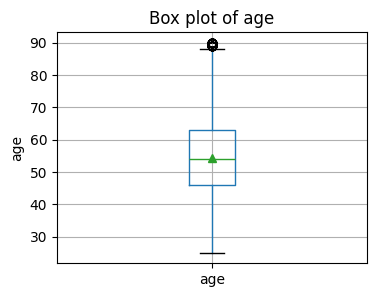

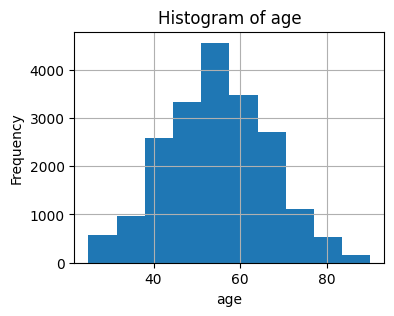

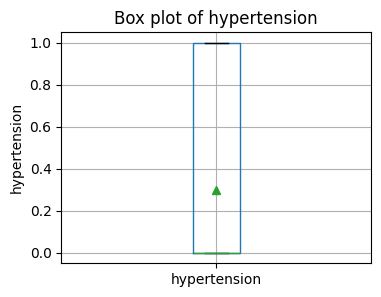

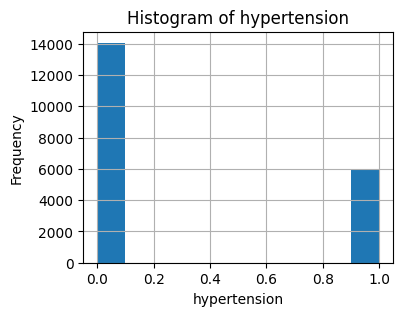

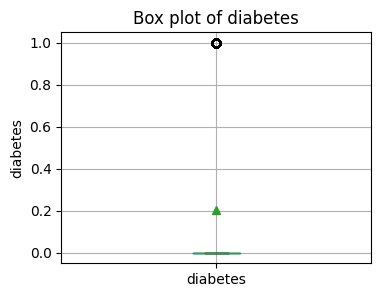

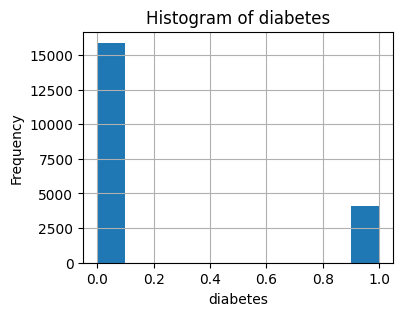

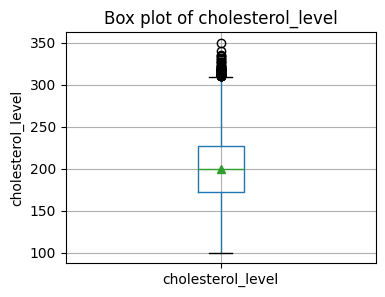

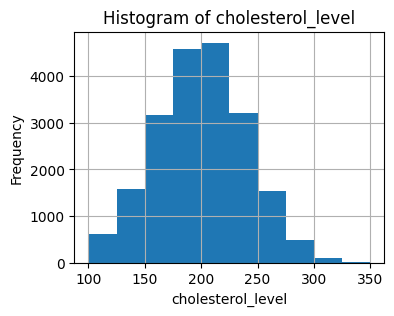

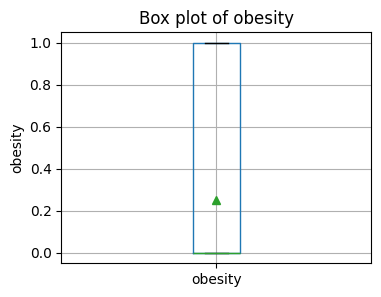

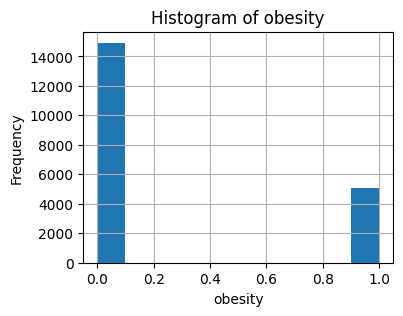

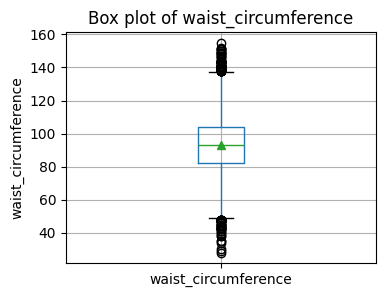

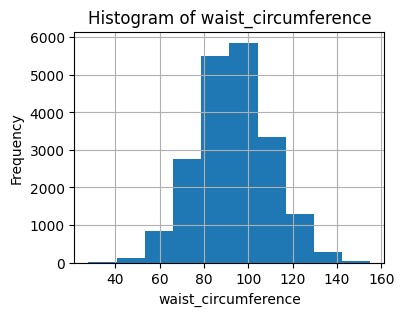

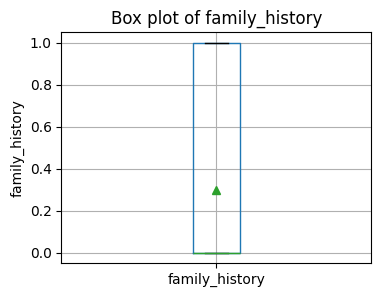

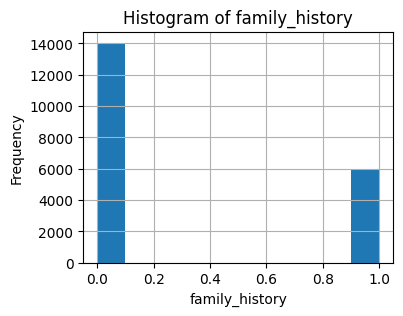

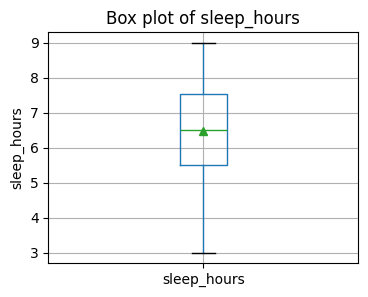

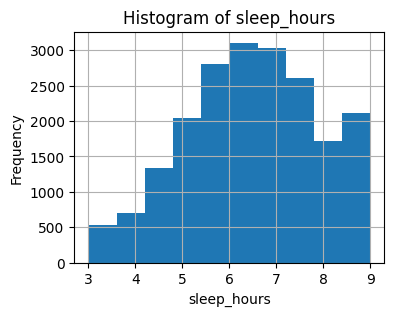

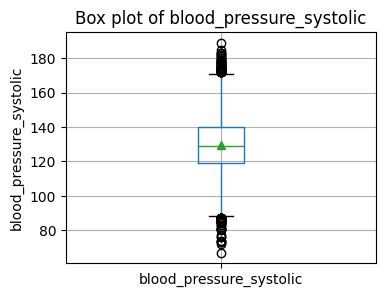

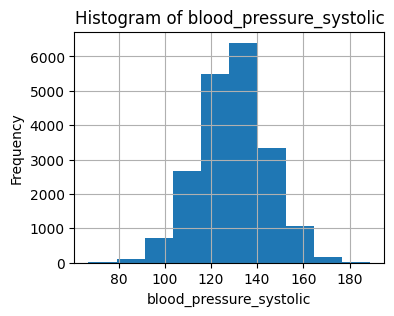

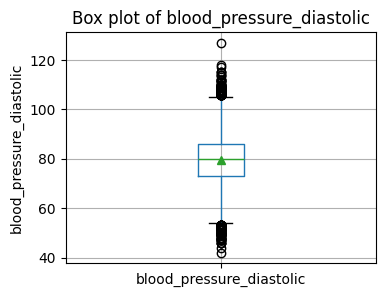

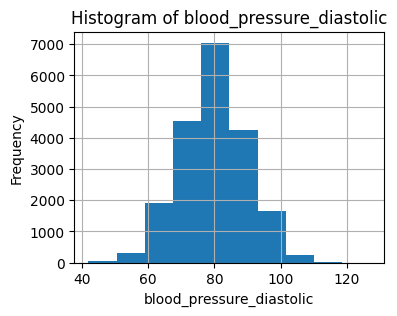

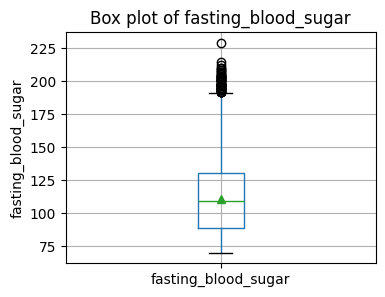

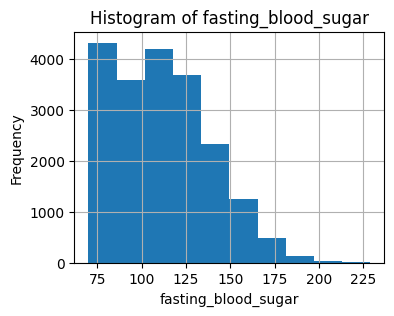

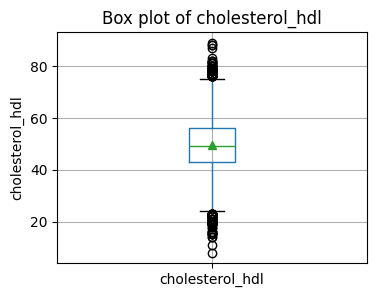

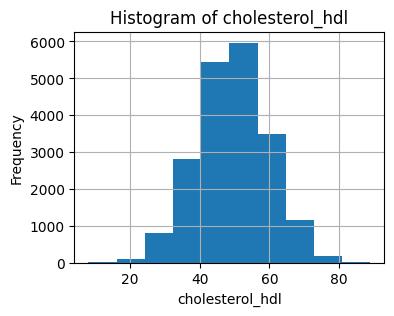

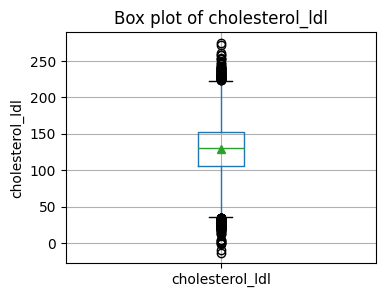

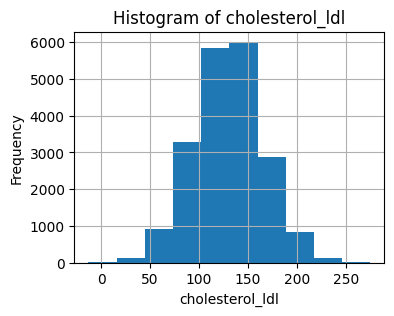

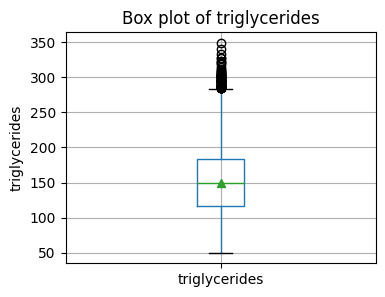

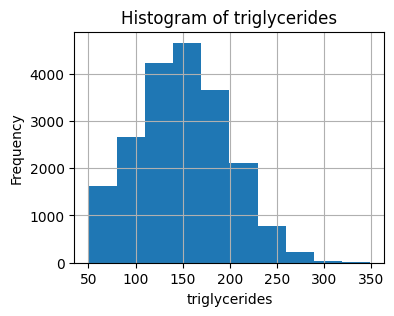

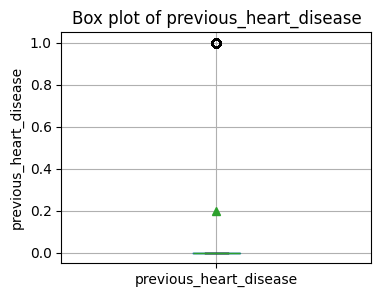

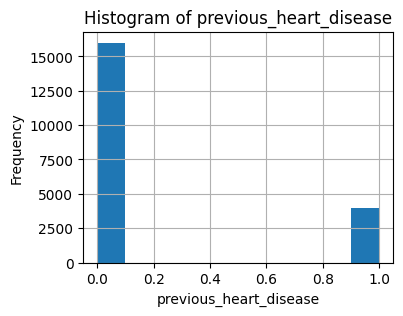

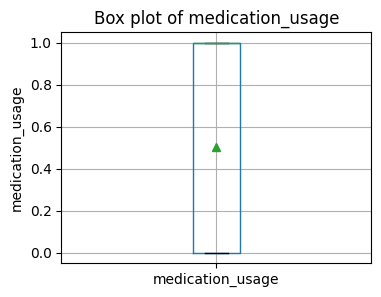

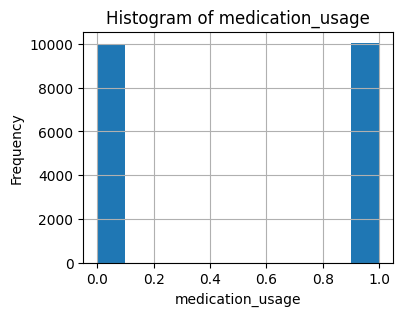

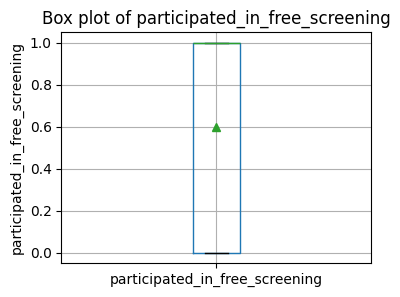

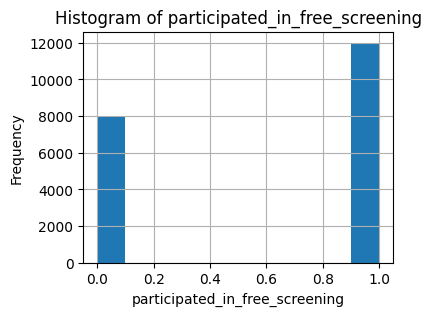

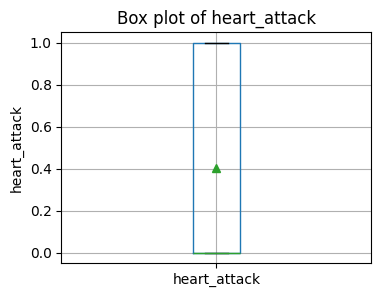

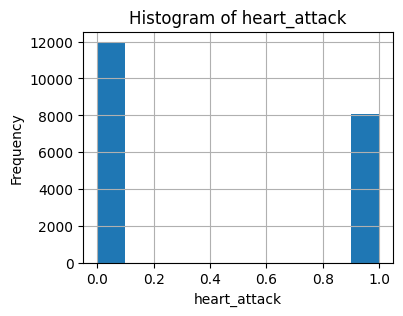

In [37]:
column_names_list = df.columns.tolist()
print("List of column names:", column_names_list)

num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

for column in num_cols:
    # Boxplot
    plt.figure(figsize=(4, 3))
    df.boxplot(
        column=[column],
        meanline=False,
        showmeans=True,
        return_type="dict"
    )
    plt.title(f"Box plot of {column}")
    plt.ylabel(column)
    plt.show()

    # Histogram
    plt.figure(figsize=(4, 3))
    df[column].hist(bins=10)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

## Identify errors or ouliers - univariate analysis

In [38]:
corr = df.corr(method="pearson", numeric_only=True)
print("Top correlations with target:")
print(corr[TARGET].abs().sort_values(ascending=False).head(10))


Top correlations with target:
heart_attack              1.000000
previous_heart_disease    0.262100
hypertension              0.258265
diabetes                  0.207095
obesity                   0.160118
age                       0.095672
cholesterol_level         0.091896
fasting_blood_sugar       0.078434
waist_circumference       0.070212
cholesterol_hdl           0.010784
Name: heart_attack, dtype: float64


## Bi-variate outlier repair - triglycerides vs cholesterol_level

In [39]:
def lin_fun(x, a, b): return a*x + b
a, b = curve_fit(lin_fun,
                 df["cholesterol_level"],
                 df["triglycerides"])[0]

residuals = df["triglycerides"] - lin_fun(df["cholesterol_level"], a, b)
mask_out = residuals.abs() > 2*residuals.std()

print(f"Replacing {mask_out.sum()} triglyceride outliers by regression prediction")
df.loc[mask_out, "triglycerides"] = lin_fun(df.loc[mask_out, "cholesterol_level"], a, b)


Replacing 1019 triglyceride outliers by regression prediction


/var/folders/03/jf9b8_ss5_ngw7_9xgwlnkg40000gn/T/ipykernel_11220/162030199.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[149.48998642 149.59688733 149.55870843 ... 149.37544974 149.70760612
 149.84886803]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[mask_out, "triglycerides"] = lin_fun(df.loc[mask_out, "cholesterol_level"], a, b)


## Handle missing values

No missing values in the dataset. Only 1 column has missing values but it is not relevant, because column has values called "None" which in pandas means null..


In [40]:
print("Missing cells per column:")
print(df.isna().sum())


Missing cells per column:
age                                   0
gender                                0
region                                0
income_level                          0
hypertension                          0
diabetes                              0
cholesterol_level                     0
obesity                               0
waist_circumference                   0
family_history                        0
smoking_status                        0
alcohol_consumption               11799
physical_activity                     0
dietary_habits                        0
air_pollution_exposure                0
stress_level                          0
sleep_hours                           0
blood_pressure_systolic               0
blood_pressure_diastolic              0
fasting_blood_sugar                   0
cholesterol_hdl                       0
cholesterol_ldl                       0
triglycerides                         0
EKG_results                           0
previous_heart

## Scale numeric columns

In [41]:
for col in num_cols:
    df[col] = (df[col] - df[col].mean()) / df[col].std()


## Encode categorical variables to numeric

Change categorical variables to numeric using one-hot encoding

In [42]:
df = pd.get_dummies(df, columns=cat_cols, dtype=np.int8)


## Save files for future use

To use the preprocessed data in the future

- heart_preprocessed.npz - for Naive Bayes
- heart_preprocessed.csv - any other modifications

In [43]:
X = df.drop(columns=[TARGET]).values       # NumPy array for Naive Bayes
y = df[TARGET].values.astype(np.int8)

np.savez_compressed("heart_preprocessed.npz", X=X, y=y)
df.to_csv("heart_preprocessed.csv", index=False)

print("Preprocessing finished")
print("Final feature matrix shape:", X.shape)


Preprocessing finished
Final feature matrix shape: (20000, 42)
